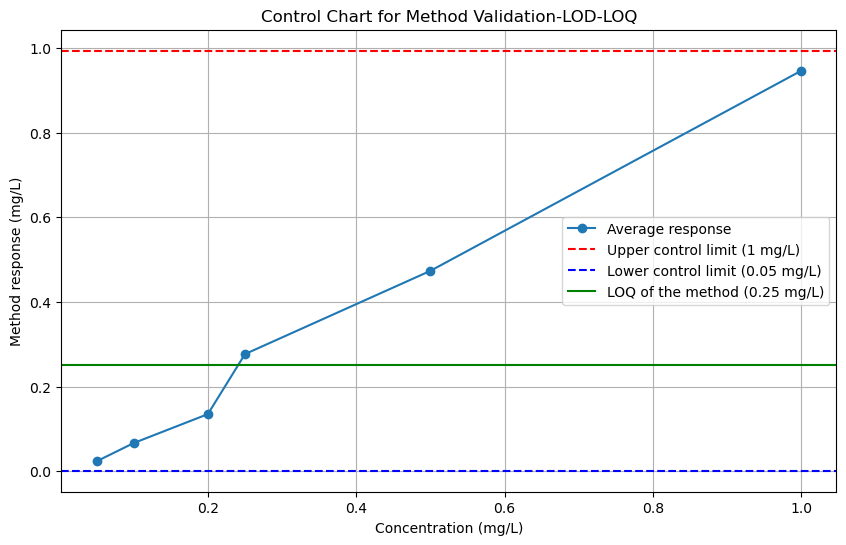

In [7]:
#LDQ-LOQ

import matplotlib.pyplot as plt
import pandas as pd

# Datos de respuesta proporcionados
datos = {
    '1 ppm': [1.014910714, 0.982857143, 0.974375, 0.975982143, 0.965089286, 0.915625, 
              0.921160714, 0.920178571, 0.916339286, 0.872232143],
    '0.5 ppm': [0.500089286, 0.489821429, 0.480982143, 0.470267857, 0.466875, 0.46125, 
                0.465089286, 0.464375, 0.475803571, 0.459464286],
    '0.25 ppm': [0.271607143, 0.285357143, 0.283392857, 0.274910714, 0.274642857, 0.282232143, 
                 0.273125, 0.275625, 0.275089286, 0.272321429],
    '0.2 ppm': [0.16, 0.142, 0.137, 0.135, 0.13, 0.127, 0.13, 0.129, 0.129, 0.132],
    '0.1 ppm': [0.09, 0.07, 0.069, 0.064, 0.059, 0.066, 0.062, 0.061, 0.064, 0.063],
    '0.05 ppm': [0.053, 0.03, 0.026, 0.02, 0.018, 0.019, 0.018, 0.019, 0.017, 0.017]
}

# Convertimos a DataFrame y calculamos estadísticas
df_concentraciones = pd.DataFrame(datos)
df_stats = df_concentraciones.agg(['mean', 'std']).transpose()
df_stats['concentration'] = [float(conc.replace(' ppm', '')) for conc in df_stats.index]

# Corregimos aquí el nombre de la columna a 'std' que es el nombre correcto
df_stats['LSC'] = df_stats['mean'] + 1.1 * df_stats['std']  # Límite Superior de Control (Upper Control Limit, UCL)
df_stats['LIC'] = df_stats['mean'] - 2 * df_stats['std']  # Límite Inferior de Control (Lower Control Limit, LCL)

# Inicializamos la figura de Matplotlib
plt.figure(figsize=(10, 6))

# Graficamos el promedio de las respuestas para cada concentración
plt.plot(df_stats['concentration'], df_stats['mean'], 'o-', label='Average response')

# Graficamos los límites de control superior e inferior para cada punto de concentración
for conc in df_stats.index:
    plt.plot(df_stats.loc[conc, 'concentration'], df_stats.loc[conc, 'LSC'], 'r--')
    plt.plot(df_stats.loc[conc, 'concentration'], df_stats.loc[conc, 'LIC'], 'b--')

# Añadimos líneas horizontales para los límites de control general
plt.axhline(y=df_stats['LSC'].max(), color='red', linestyle='--', label='Upper control limit (1 mg/L)')
plt.axhline(y=df_stats['LIC'].min(), color='blue', linestyle='--', label='Lower control limit (0.05 mg/L)')

# Añadimos línea horizontal para el LOQ del método basado en el % de recuperación
loq_metodo = '0.25 mg/L'  # Esto se determinó previamente en la conversación
loq_metodo_value = float(loq_metodo.replace(' mg/L', ''))
plt.axhline(y=loq_metodo_value, color='green', linestyle='-', label=f'LOQ of the method ({loq_metodo_value} mg/L)')

# Añadimos etiquetas y título al gráfico
plt.xlabel('Concentration (mg/L)')
plt.ylabel('Method response (mg/L)')
plt.title('Control Chart for Method Validation-LOD-LOQ')
plt.legend()

# Añadimos la cuadrícula al gráfico
plt.grid(True)

# Mostramos el gráfico
plt.savefig("../Result/Methods_validation/Figuras/PNG/figura1.png", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.savefig("../Result/Methods_validation/Figuras/PDF/figura1.pdf", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.show()


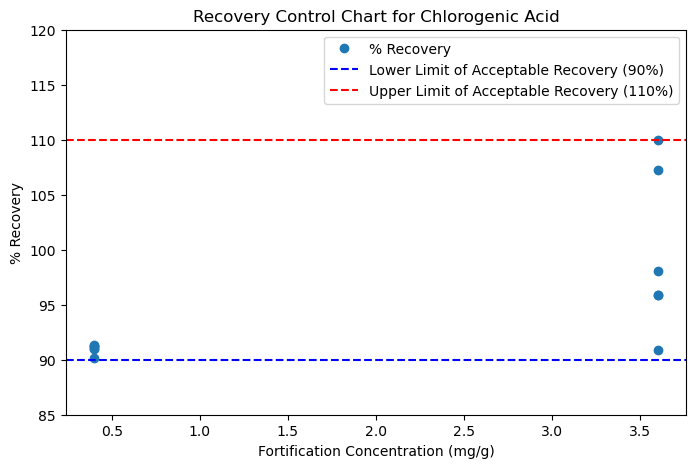

In [4]:
# Reintentamos la creación de la carta de control considerando el rango de recuperación de 90 a 100%

import matplotlib.pyplot as plt
import pandas as pd

# Datos de recuperación proporcionados
concentraciones_fortificacion = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6]  # mg/g de Ácido Clorogénico
porcentajes_recuperacion = [90.95, 91.27, 91.10, 90.20, 91.27, 91.33, 90.88, 95.87, 110, 95.87, 98.06, 107.25]  # % de recuperación

# Crear la carta de control
plt.figure(figsize=(8, 5))

# Graficar los porcentajes de recuperación para cada concentración de fortificación
plt.plot(concentraciones_fortificacion, porcentajes_recuperacion, 'o', label='% Recovery')

# Añadir línea horizontal para el porcentaje de recuperación esperado
# plt.axhline(y=90.95, color='green', linestyle='--', label='Recuperación Esperada (90.95%)')

# Añadir líneas horizontales para el rango de recuperación aceptable (90% a 100%)
plt.axhline(y=90, color='blue', linestyle='--', label='Lower Limit of Acceptable Recovery (90%)')
plt.axhline(y=110, color='red', linestyle='--', label='Upper Limit of Acceptable Recovery (110%)')

# Añadir etiquetas y título
plt.title('Recovery Control Chart for Chlorogenic Acid')
plt.xlabel('Fortification Concentration (mg/g)')
plt.ylabel('% Recovery')
plt.legend()
plt.ylim(85, 120)  # Ajustar el límite del eje Y para mejor visualización

# Mostramos el gráfico
plt.savefig("../Result/Methods_validation/Figuras/PNG/figura2.png", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.savefig("../Result/Methods_validation/Figuras/PDF/figura2.pdf", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.show()


In [7]:
#Precisión
import pandas as pd
from scipy.stats import variation

# Cargando el archivo Excel
file_path = 'C:/Users/User/Documents/Documentos_Tesis/Estadistica/Validacion de metodo/Presicion.xlsx'
data = pd.read_excel(file_path)

# Convirtiendo la columna 'Dia' al formato de fecha
data['Dia'] = pd.to_datetime(data['Day']).dt.date

# Calculando el coeficiente de variación porcentual (% CV) para la repetibilidad y precisión intermedia

# Repetibilidad (CV diario por rango)
cv_repetibilidad = data.groupby(['Day', 'Amount']).agg({'Concentration': lambda x: variation(x, axis=0) * 100})

# Precisión intermedia (CV total por rango)
cv_intermedia = data.groupby('Amount').agg({'Concentration': lambda x: variation(x, axis=0) * 100})

# Mostrando los resultados
print("Coefficient of Variation for Repeatability:")
print(cv_repetibilidad)
print("\nCoefficient of Variation for Intermediate Precision:")
print(cv_intermedia)

Coefficient of Variation for Repeatability:
                    Concentration
Day        Amount                
2023-08-16 Average       3.052900
           High          4.123339
           Low           5.013080
2023-08-17 Average       5.885766
           High          5.182818
           Low          20.567417
2023-08-18 Average       3.814585
           High          0.010044
           Low          28.181180

Coefficient of Variation for Intermediate Precision:
         Concentration
Amount                
Average       5.616247
High          6.631884
Low          20.628061


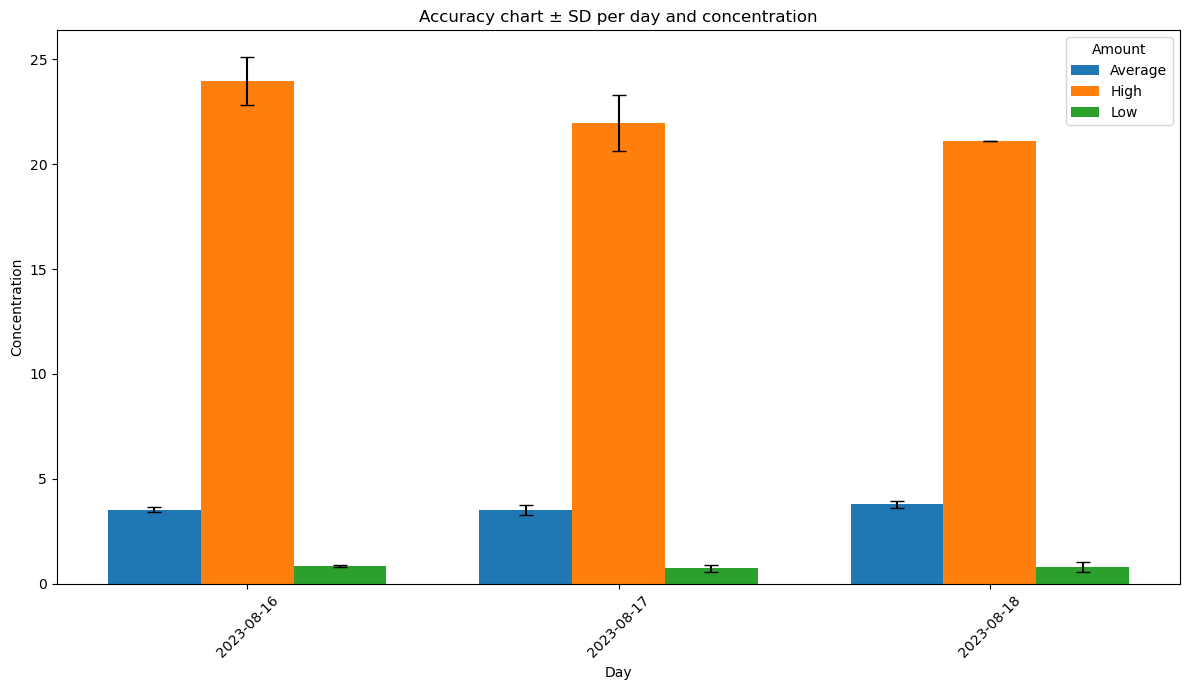

(         Day   Amount   mean   std  %CV_repeatability
 0 2023-08-16  Average   3.53  0.12               3.53
 1 2023-08-16     High  23.98  1.14               4.76
 2 2023-08-16      Low   0.83  0.05               5.79
 3 2023-08-17  Average   3.51  0.24               6.80
 4 2023-08-17     High  21.96  1.31               5.98
 5 2023-08-17      Low   0.74  0.18              23.75
 6 2023-08-18  Average   3.79  0.17               4.40
 7 2023-08-18     High  21.12  0.00               0.01
 8 2023-08-18      Low   0.80  0.26              32.54,
           mean   std  %CV_intermediate
 Amount                                
 Average   3.61  0.16              4.30
 High     22.36  1.47              6.57
 Low       0.79  0.05              5.98)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
file_path = 'C:/Users/User/Documents/Documentos_Tesis/Estadistica/Validacion de metodo/Presicion.xlsx'
data = pd.read_excel(file_path)

# Asegurar que las fechas estén en formato correcto
data['Day'] = pd.to_datetime(data['Day'], dayfirst=True).dt.date

# Agrupar por día y concentración
agrupado = data.groupby(['Day', 'Amount'])['Concentration']
mean_df = agrupado.mean().unstack()
std_df = agrupado.std().unstack()

# Preparar gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Parámetros de gráfico
dias = mean_df.index
tipos = mean_df.columns
ancho = 0.25
x = np.arange(len(dias))

# Dibujar cada barra por tipo de Amount
for i, tipo in enumerate(tipos):
    medias = mean_df[tipo]
    stds = std_df[tipo]
    ax.bar(x + i*ancho, medias, yerr=stds, capsize=5, label=tipo, width=ancho)

# Etiquetas y formato
ax.set_xticks(x + ancho)
ax.set_xticklabels([str(d) for d in dias], rotation=45)
ax.set_title('Accuracy chart ± SD per day and concentration')
ax.set_ylabel('Concentration')
ax.set_xlabel('Day')
ax.legend(title='Amount')
plt.tight_layout()

# Guardar y mostrar
plt.savefig('../Result/Methods_validation/Figuras/PDF/barras_agrupadas_precision.pdf', dpi=300)
plt.savefig('../Result/Methods_validation/Figuras/PNG/barras_agrupadas_precision.PNG', dpi=300)
plt.show()

data_multi_day = data
df_multi = pd.DataFrame(data_multi_day)
df_multi["Day"] = pd.to_datetime(df_multi["Day"])

# Repetibilidad: variación dentro del mismo día (Intra_day) por nivel de concentración
repetibilidad = df_multi.groupby(['Day', 'Amount'])['Concentration'].agg(['mean', 'std'])
repetibilidad['%CV_repeatability'] = (repetibilidad['std'] / repetibilidad['mean']) * 100

# Precisión intermedia: variación entre días por nivel de concentración
# Primero agrupar por día y amount para obtener la media diaria
media_diaria = df_multi.groupby(['Day', 'Amount'])['Concentration'].mean().reset_index()
precision_intermedia = media_diaria.groupby('Amount')['Concentration'].agg(['mean', 'std'])
precision_intermedia['%CV_intermediate'] = (precision_intermedia['std'] / precision_intermedia['mean']) * 100

# Formatear
repetibilidad = repetibilidad.reset_index().round(2)
precision_intermedia = precision_intermedia.round(2)

repetibilidad, precision_intermedia


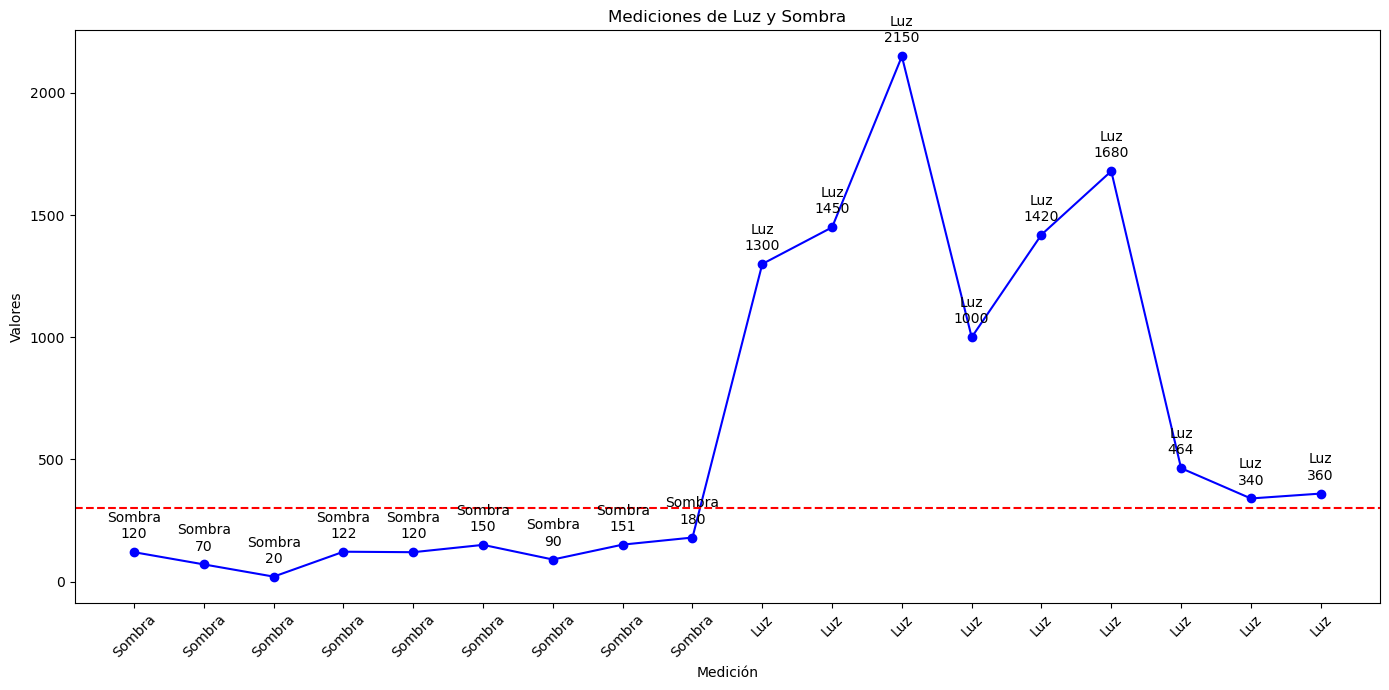

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os  # Importar para manejar directorios

# Datos
condiciones_nuevos = ['Sombra'] * 9 + ['Luz'] * 9
valores_nuevos = [120, 70, 20, 122, 120, 150, 90, 151, 180, 
                  1300, 1450, 2150, 1000, 1420, 1680, 464, 340, 360]

# Crear DataFrame
df_nuevos = pd.DataFrame({
    'Condiciones': condiciones_nuevos,
    'Valores': valores_nuevos
})
df_nuevos['Index'] = range(len(df_nuevos))

# Crear figura
plt.figure(figsize=(14, 7))
plt.plot(df_nuevos['Index'], df_nuevos['Valores'], marker='o', linestyle='-', color='blue')

# Añadir etiquetas a cada punto
for i, (val, cond) in enumerate(zip(df_nuevos['Valores'], df_nuevos['Condiciones'])):
    plt.annotate(f'{cond}\n{val}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center')

# Línea horizontal en y=300
plt.axhline(y=300, color='red', linestyle='--')

# Títulos y ejes
plt.title('Mediciones de Luz y Sombra')
plt.xlabel('Medición')
plt.ylabel('Valores')
plt.xticks(df_nuevos['Index'], df_nuevos['Condiciones'], rotation=45)
plt.tight_layout()

# --- Guardar ANTES de mostrar ---
# Definir rutas
png_path = "../Result/Methods_validation/Figuras/PNG/figura3.png"
pdf_path = "../Result/Methods_validation/Figuras/PDF/figura3.pdf"

# Crear directorios si no existen
os.makedirs(os.path.dirname(png_path), exist_ok=True)
os.makedirs(os.path.dirname(pdf_path), exist_ok=True)

# Guardar imágenes
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')

# Mostrar gráfica (después de guardar)
plt.show()